Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [2]:
import glob
import os

PATH = os.getcwd()+ "/Data"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    
df_list = [pd.read_csv(file) for file in all_files]    # reads in all .csv files and saves them as dataframes in a list

df_concatenated = pd.concat(df_list)                   # concatenats all dataframes into one
#print(df_concatenated.index)
df_concatenated.sort_values('SubjectID', inplace=True) # sorts the Dataframe according to the SubjectIDs
df_concatenated['SubjectID'] = 7000 + df_concatenated['SubjectID'].astype(int) # SubjectID convention
df_concatenated.reset_index(drop=True,inplace=True)    # Updates the index in an ascending way

print(df_concatenated.shape)

# use pd.set_option here to display in a nice way
# didn't use pd.set_options because it's already displayed nicely

# save concatenated dataframe

outname = 'data_concatenated.csv'                      # output name
outdir = './Processed'                                 # output dircetory

# checks if output directory exists, if not, creates it                                                        
if not os.path.exists(outdir):                         
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)               # creats the full name, i.e. directory + filename

df_concatenated.to_csv(fullname)                       # saves the dataframe as .csv

(800, 4)


### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [11]:
#creates column congruence according to it's above given definition
df_concatenated['congruence'] = (df_concatenated['StimulusType'] == df_concatenated['response']).astype(bool)


# create a new dataframe with averaged data

df_concatenated_avg = df_concatenated[['SubjectID','StimulusType','RT','congruence']] #specifies which columns to keep

df_concatenated_avg['RT'].replace(0, np.NaN, inplace=True)                            #replace zeros with NaNs
#df_concatenated_avg = df_concatenated_avg[df_concatenated_avg.RT != 0] 

print(df_concatenated_avg)
df_concatenated_avg = df_concatenated.groupby(['SubjectID','StimulusType']).mean()             #computes the means

df_concatenated_avg.rename(columns={'congruence': 'accuracy'}, inplace=True)          #renames congruence to accuracy

print(df_concatenated_avg)


# save averaged dataframe

df_concatenated_avg.to_csv('./Processed/data_concatenated_averaged.csv')              #saves new dataframe to Processed



     SubjectID  StimulusType     RT  congruence
0         7001             1  453.0        True
1         7001             1  322.0        True
2         7001             1  286.0        True
3         7001             1   87.0        True
4         7001             1  268.0        True
5         7001             1  435.0        True
6         7001             0   18.0       False
7         7001             1  217.0        True
8         7001             1   36.0        True
9         7001             1  333.0        True
10        7001             0   62.0       False
11        7001             1   34.0        True
12        7001             1   33.0        True
13        7001             1  185.0        True
14        7001             1   18.0        True
15        7001             1  267.0        True
16        7001             1  338.0        True
17        7001             1  116.0        True
18        7001             1  317.0        True
19        7001             1  452.0     

/home/bommi/.conda/envs/acc/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

<class 'matplotlib.legend.Legend'>


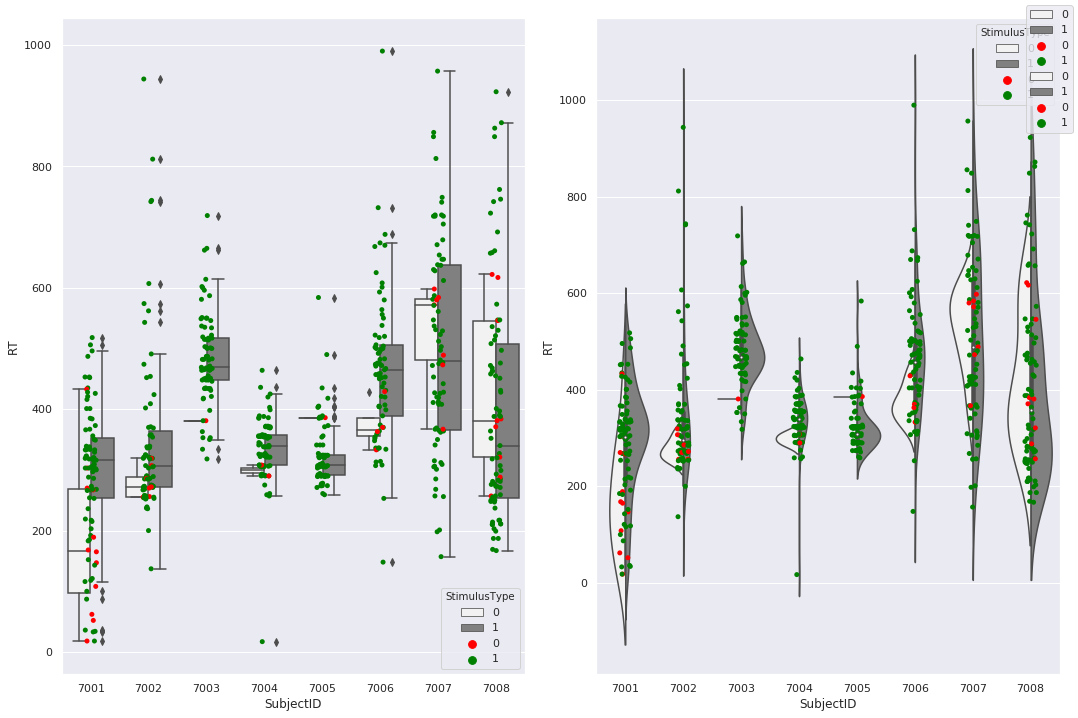

In [8]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")
data_concat['RT'].replace(0, np.NaN, inplace=True)                            #replace zeros with NaNs

# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))


# first subplot with stripplot and boxplot
sns.stripplot(data = data_concat, x='SubjectID', y='RT', hue='StimulusType',ax=axes[0],palette=('red','green'))
sns.boxplot(data = data_concat, x='SubjectID', y='RT', hue='StimulusType',ax=axes[0],color='grey')

# second subplot with stripplot and violinplot

sns.stripplot(data = data_concat, x='SubjectID', y='RT', hue='StimulusType',ax=axes[1],palette=('red','green'))
sns.violinplot(data = data_concat, x='SubjectID', y='RT', hue='StimulusType',color='grey', split=True,ax=axes[1])

# handling legends
print(type(fig.legend()))
fig.tight_layout()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

In [ ]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID

#get all .csv files by crawling throught the directories
PATH = os.getcwd()+ "/Experimental_Data"

parent_dir = PATH
subject_dirs = [os.path.join(parent_dir, dir) for dir in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, dir))]

filelist = []
dir_list = []
for dir in subject_dirs:
    csv_files = [os.path.join(dir, csv) for csv in os.listdir(dir) if os.path.isfile(os.path.join(dir, csv)) and csv.endswith('.csv')]
    for file in csv_files:
        filelist.append(file)
        dir_list.append(dir)
        
print(dir_list)

#all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                     # http://www.oipapio.com/question-88634    

df_list = [pd.read_csv(file) for file in filelist]    # reads in all .csv files and saves them as dataframes in a list

#cleans the list of dataframes from corrupt dataframes, i.e. too many/not enough columns
#and saves them in df_clean_list. From 68 .csv files 61 survive
df_list_clean = []
for frame in range(len(df_list)):
    if (len(df_list[frame].columns)==4):
        df_list_clean.append(df_list[frame])
        
        
        
df_concatenated = pd.concat(df_list_clean)                   # concatenats all dataframes into one, results in 6100 rows
print(df_concatenated.SubjectID.unique())


#df_concatenated.sort_values('SubjectID', inplace=True) # sorts the Dataframe according to the SubjectIDs
#print(df_concatenated.index)
# Now it's time to plot your results
#figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row")

# violin plot for your group's data
# TODO

# violin plot of all group's data
# TODO


Compare two datasets and relate it with CLT. Write your opinion here.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

In [ ]:
# TODO